In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [41]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [42]:
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

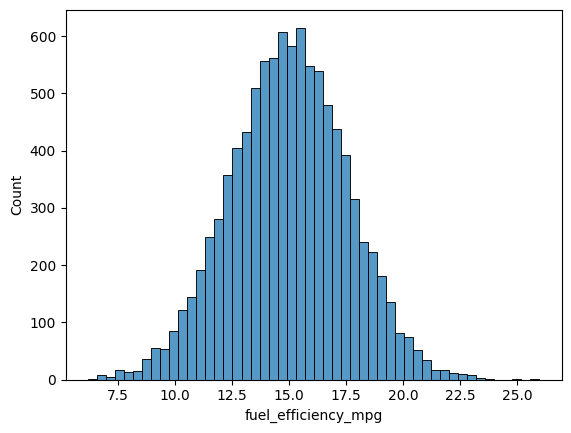

In [44]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [45]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [46]:
df['horsepower'].median()

np.float64(149.0)

In [47]:
n = len(df)
n


9704

In [48]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [49]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [50]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [51]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [52]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [53]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [54]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [55]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [56]:
# x_train = df_train.fillna(0).values
# w0,w = train_linear_regression(x_train,y_train)
# y_pred = w0 + x_train.dot(w)

In [57]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [58]:
""" rmse(y_train, y_pred) """

' rmse(y_train, y_pred) '

In [59]:
def prepare_X(df):
    df_num = df.fillna(0)
    return df_num.values

In [60]:
X_train_zero = prepare_X(df_train)
w_0, w = train_linear_regression(X_train_zero, y_train)

In [61]:
X_val_zero = prepare_X(df_val)
y_pred_zero = w_0 + X_val_zero.dot(w)

In [62]:
rmse_zero = rmse(y_val, y_pred_zero)
rmse_zero.round(2)

np.float64(0.52)

In [63]:
mean_hp = df_train['horsepower'].mean()
mean_hp

np.float64(149.54476367006487)

In [64]:
def prepare_X_mean(df):
    df_num = df.fillna(mean_hp)
    return df_num.values

In [65]:
X_train_mean = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train_mean, y_train)
X_val_mean = prepare_X_mean(df_val)
y_pred_mean = w_0 + X_val_mean.dot(w)

In [66]:
rmse_mean = rmse(y_val, y_pred_mean)
rmse_mean.round(2)

np.float64(0.46)

In [68]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [69]:
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [70]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rounded_rmse = round(rmse(y_val, y_pred), 2)
    print('%6s  %10.2f' % (r, rounded_rmse))

     0        0.52
  0.01        0.52
   0.1        0.52
     1        0.52
     5        0.52
    10        0.52
   100        0.52


In [81]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df):
    df_num = df.fillna(0)
    return df_num.values 

rmse_results = []

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

    y_train = df_train['fuel_efficiency_mpg']
    y_val = df_val['fuel_efficiency_mpg']
    y_test = df_test['fuel_efficiency_mpg']

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)

    rmse_val = rmse(y_val, y_pred)
    rmse_results.append((seed, rmse_val))

all_rmse_scores = [score for seed, score in rmse_results]
std_rmse = np.std(all_rmse_scores)
rounded_std = round(std_rmse, 3)

for seed, score in rmse_results:
    print(f"Seed: {seed}, RMSE: {round(score, 4)}")
    
print(f"Standard Deviation: {rounded_std}")


Seed: 0, RMSE: 0.5207
Seed: 1, RMSE: 0.5213
Seed: 2, RMSE: 0.5228
Seed: 3, RMSE: 0.516
Seed: 4, RMSE: 0.5109
Seed: 5, RMSE: 0.5283
Seed: 6, RMSE: 0.5314
Seed: 7, RMSE: 0.5091
Seed: 8, RMSE: 0.5147
Seed: 9, RMSE: 0.5132
Standard Deviation: 0.007


In [ ]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


def prepare_X(df):
    df_num = df.fillna(0)
    return df_num.values

np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)


df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])


X_full_train = prepare_X(df_full_train)
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)

print("RMSE:", round(score, 3))


RMSE: 0.516


--- RMSE Scores Per Seed ---
Seed 0: 0.5207
Seed 1: 0.5213
Seed 2: 0.5228
Seed 3: 0.5160
Seed 4: 0.5109
Seed 5: 0.5283
Seed 6: 0.5314
Seed 7: 0.5091
Seed 8: 0.5147
Seed 9: 0.5132

---------------------------
Standard Deviation (Unrounded): 0.0070
Rounded Standard Deviation: 0.007
